# Loan Data Class Assignment

This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors.

Use Ensemble model to predict and evaluate the performance of the model


Install the libraries in an environment: `pip install pandas numpy matplotlib scikit-learn ipykernel`

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [2]:
df = pd.read_csv("../data/LoanData.csv")
df

,index,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,1,debt_consolidation,0.1189,829.10,11.3504,19.48,737,5639.9583,28854,52.1,0,0,0,0
1,2,1,credit_card,0.1071,228.22,11.0821,14.29,707,2760.0000,33623,76.7,0,0,0,0
2,3,1,debt_consolidation,0.1357,366.86,10.3735,11.63,682,4710.0000,3511,25.6,1,0,0,0
3,4,1,debt_consolidation,0.1008,162.34,11.3504,8.10,712,2699.9583,33667,73.2,1,0,0,0
4,5,1,credit_card,0.1426,102.92,11.2997,14.97,667,4066.0000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,1,debt_consolidation,0.0775,156.11,10.7144,5.00,762,2131.0000,1359,5.6,2,0,0,0
96,97,1,debt_consolidation,0.1154,329.95,12.3239,20.00,727,10292.0000,107501,44.8,2,0,0,0
97,98,1,all_other,0.0807,313.67,12.0610,0.72,787,8010.0000,3054,5.6,3,0,0,0
98,99,1,all_other,0.0807,297.99,11.4076,2.44,792,8717.9583,40384,9.6,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              100 non-null    int64  
 1   credit_policy      100 non-null    int64  
 2   purpose            100 non-null    object 
 3   int_rate           100 non-null    float64
 4   installment        100 non-null    float64
 5   log_annual_inc     100 non-null    float64
 6   dti                100 non-null    float64
 7   fico               100 non-null    int64  
 8   days_with_cr_line  100 non-null    float64
 9   revol_bal          100 non-null    int64  
 10  revol_util         100 non-null    float64
 11  inq_last_6mths     100 non-null    int64  
 12  delinq_2yrs        100 non-null    int64  
 13  pub_rec            100 non-null    int64  
 14  not_fully_paid     100 non-null    int64  
dtypes: float64(6), int64(8), object(1)
memory usage: 11.8+ KB


In [4]:
# Check for missing values
if df.isnull().sum().sum() > 0:
    print("Missing values found in the dataset.")
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [5]:
df.columns

Index(['index', 'credit_policy', 'purpose', 'int_rate', 'installment',
       'log_annual_inc', 'dti', 'fico', 'days_with_cr_line', 'revol_bal',
       'revol_util', 'inq_last_6mths', 'delinq_2yrs', 'pub_rec',
       'not_fully_paid'],
      dtype='object')

In [6]:
X = df.drop(columns=["index", "not_fully_paid"])
y = df["not_fully_paid"]

Since there is one column of object type, encoded it so that it can be scaled

In [7]:
X.purpose.value_counts()

purpose
debt_consolidation    28
credit_card           23
all_other             23
home_improvement      13
small_business         8
educational            3
major_purchase         2
Name: count, dtype: int64

In [8]:
X["purpose"] = X["purpose"].astype("category").cat.codes
X.purpose.value_counts()

purpose
2    28
1    23
0    23
4    13
6     8
3     3
5     2
Name: count, dtype: int64

not_fully_paid
0    90
1    10
Name: count, dtype: int64


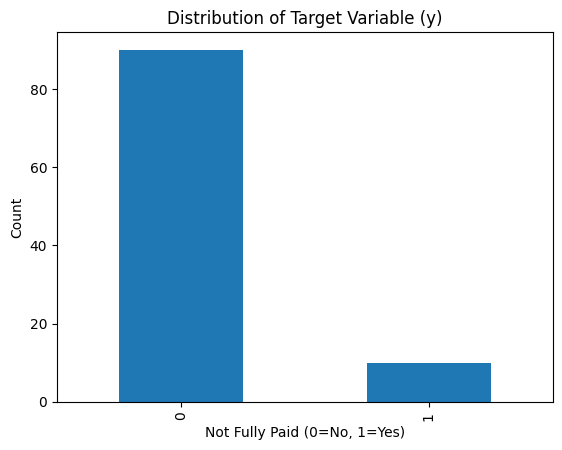

In [9]:
print(y.value_counts())
y.value_counts().plot(kind='bar')
plt.xlabel('Not Fully Paid (0=No, 1=Yes)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (y)')
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [11]:
print(np.unique(y_test))

[0 1]


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
rf = RandomForestClassifier(max_depth=3, n_estimators=250, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,250
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

In [15]:
np.unique(y_proba)

array([0.00411582, 0.0060248 , 0.00920462, 0.01289565, 0.01455032,
       0.01491487, 0.01522122, 0.01827575, 0.01883349, 0.01981543,
       0.02084082, 0.02200129, 0.02377674, 0.02383774, 0.02617212,
       0.02682289, 0.03172843, 0.0321646 , 0.03217436, 0.03379745,
       0.03913107, 0.03954288, 0.04336172, 0.04345408, 0.04828999,
       0.0566375 , 0.05756326, 0.06054923, 0.06174088, 0.06235895,
       0.06979176, 0.07290398, 0.0746087 , 0.07565982, 0.08760217,
       0.09877593, 0.10134035, 0.10687917, 0.16723561, 0.18267323,
       0.19354618, 0.19769554, 0.21753699, 0.23292642, 0.2611701 ,
       0.27599698, 0.27812707, 0.44252901, 0.46440421, 0.4710592 ])

In [16]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cross_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
roc_auc = roc_auc_score(y_test, y_proba)

c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [17]:
print("Accuracy: ", accuracy)
print("Classification Report: \n", report)
print("Cross Validation on Accuracy: ", cross_score)
print("AUC-ROC Score: ", roc_auc)

Accuracy:  0.9
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        45
           1       0.00      0.00      0.00         5

    accuracy                           0.90        50
   macro avg       0.45      0.50      0.47        50
weighted avg       0.81      0.90      0.85        50

Cross Validation on Accuracy:  [0.9 0.9 0.9 0.9 0.9]
AUC-ROC Score:  0.808888888888889


In [18]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[45  0]
 [ 5  0]]


              Feature  Importance
3         installment    0.205512
5                 dti    0.184358
2            int_rate    0.150429
9          revol_util    0.085864
8           revol_bal    0.081831
7   days_with_cr_line    0.067302
4      log_annual_inc    0.061569
6                fico    0.059054
1             purpose    0.058155
10     inq_last_6mths    0.023002
12            pub_rec    0.022532
11        delinq_2yrs    0.000390
0       credit_policy    0.000000


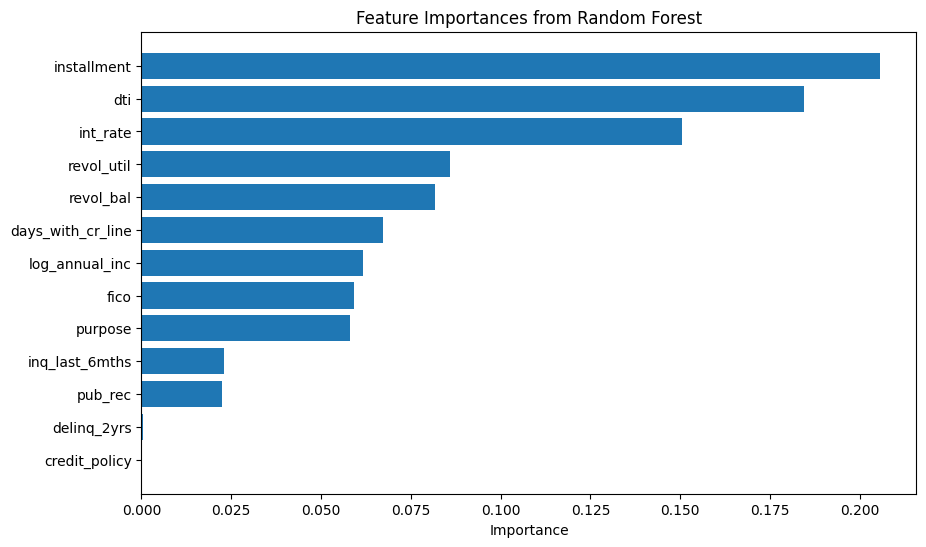

In [19]:
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance_df)

plt.figure(figsize=(10,6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

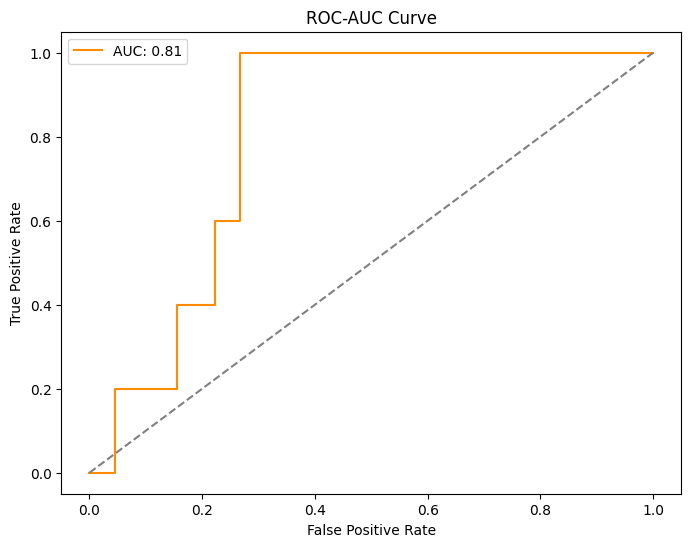

In [20]:
# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth and n_estimators
param_grid = {
    'max_depth': np.arange(1, 20),
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# Initialize the RandomForestClassifier
rf_grid = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(rf_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': np.int64(1), 'n_estimators': 50}
Best cross-validated accuracy: 0.9


c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

Accuracy:  0.9
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        45
           1       0.00      0.00      0.00         5

    accuracy                           0.90        50
   macro avg       0.45      0.50      0.47        50
weighted avg       0.81      0.90      0.85        50

Cross Validation on Accuracy:  [0.9 0.9 0.9 0.9 0.9]
AUC-ROC Score:  0.7644444444444445
Confusion Matrix:
 [[45  0]
 [ 5  0]]


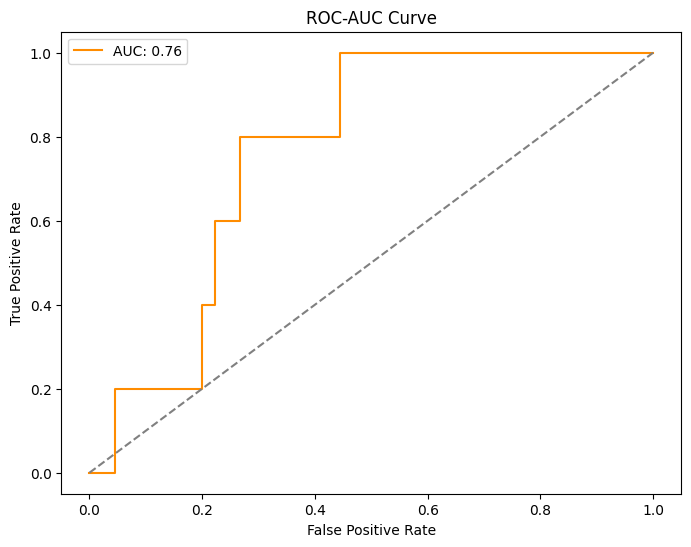

In [22]:
optimal_rf = RandomForestClassifier(max_depth=1, n_estimators=50, random_state=42)
optimal_rf.fit(X_train, y_train)

y_pred = optimal_rf.predict(X_test)
y_proba = optimal_rf.predict_proba(X_test)[:, 1]  # Probability for ROC AUC

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cross_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy: ", accuracy)
print("Classification Report: \n", report)
print("Cross Validation on Accuracy: ", cross_score)
print("AUC-ROC Score: ", roc_auc)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# AUC-ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [23]:
# Train Logistic Regression
logreg = LogisticRegression(max_iter=45, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)

c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 45 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=45).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,45
,multi_class,'deprecated'


In [24]:
# Predict
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba(X_test)[:, 1]


In [25]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
report_logreg = classification_report(y_test, y_pred_logreg)
cross_score_logreg = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
roc_auc_logreg = roc_auc_score(y_test, y_proba_logreg)

c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\arnol\OneDrive\Documents\School\ML\ML-Classwork\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

In [26]:
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:\n", report_logreg)
print("Cross Validation on Accuracy:", cross_score_logreg)
print("AUC-ROC Score:", roc_auc_logreg)

Logistic Regression Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        27
           1       0.00      0.00      0.00         3

    accuracy                           0.90        30
   macro avg       0.45      0.50      0.47        30
weighted avg       0.81      0.90      0.85        30

Cross Validation on Accuracy: [0.92857143 0.92857143 0.92857143 0.85714286 0.85714286]
AUC-ROC Score: 0.7407407407407407


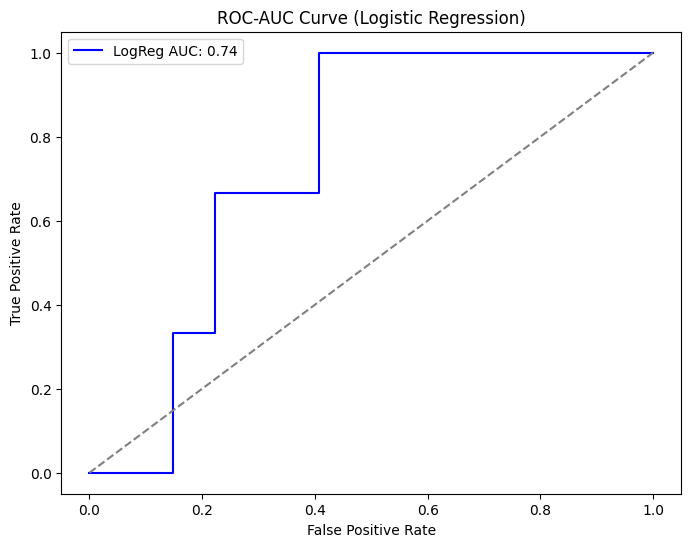

In [27]:
# ROC-AUC Curve for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f"LogReg AUC: {roc_auc_logreg:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (Logistic Regression)")
plt.legend()
plt.show()